# STATISTICS

In [1]:
import statistics as st
var = [2, 4, 4, 4, 5, 5, 7, 9]

### (1) The Central Tendencies
Pythogorean Means (arithmetic+harmonic), Mode, Median

In [2]:
st.mean(var)

5

In [3]:
round(st.harmonic_mean(var), 4)

4.2018

In [4]:
st.mode(var)

4

In [5]:
st.median_low(var)

4

In [6]:
st.median(var)

4.5

In [7]:
st.median_high(var)

5

In [8]:
import numpy as np

In [9]:
np.percentile(var, 25)

4.0

In [10]:
np.percentile(var, 50)

4.5

### (2) The Dispersion of Data

**VARIANCE and STANDARD DEVIATION**
* **How far the data spread out?**
<br>The **greater** the standard deviation, the **more heterogeneous / varied** the data.
<br>The **smaller** the standard deviation, the **more homogeneous / similar** the data.

In [11]:
st.variance(var)

4.571428571428571

In [12]:
st.stdev(var)

2.138089935299395

To use <b>.var()</b> for getting Variance and <b>.std()</b> for Standard Deviation, by default ddof = 0.<br>
Try to change <b>ddof = 1</b> as standard statistical practice. ('ddof' stands for ' <i>Delta Degrees of Freedom</i> ')

In [13]:
np.var(var, ddof=1)

4.571428571428571

In [14]:
np.std(var, ddof=1)

2.138089935299395

**COVARIANCE and CORRELATION COEFFICIENT**
* **How linearly related are one variable to another?**
<br>If .corrcoef(x, y) == 0, then variables are <b>uncorrelated</b>.<br>
If .corrcoef(x, y) > 0, then variables are <b>positively correlated</b> (directly proportional).<br>
If .corrcoef(x, y) < 0, then variables are <b>negatively correlated</b> (inversely proportional).

In [15]:
x = var
y = [10, 13, 15, 14, 13, 16, 18, 21]

Unlike .std() and .var(), this <b>.cov()</b> has default <b>ddof = 1</b>.<br>

In [16]:
np.cov(x, y)

array([[ 4.57142857,  6.85714286],
       [ 6.85714286, 11.42857143]])

<b>COVARIANCE with 3D</b><br>
Use <b>.cov()</b>, but make sure all variables are on the <b>same shape</b> (check with <b>np.shape()</b>).

In [17]:
np.cov(np.array([x, y, [13, 3, 22, 15, 9, 10, 14, 6]]))

array([[ 4.57142857,  6.85714286, -3.85714286],
       [ 6.85714286, 11.42857143, -2.28571429],
       [-3.85714286, -2.28571429, 34.57142857]])

<b>CORRELATION*: Normalization of Covariance</b><br>
Use <b>.corrcoef</b>, '<i>correlaton coefficient'. Its value range is between <b>-1</b> and <b>+1</b>.<br>
    *<i>also known as Product Moment Correlation Coefficient (PMCC) or Bivariant Correlation</i>

In [18]:
np.corrcoef(x, y)

array([[1.       , 0.9486833],
       [0.9486833, 1.       ]])

### (3) The Visualization of Data

<b>(3.1) SCATTER PLOT</b><br>
Marker for <b>plt.scatter()</b>: https://matplotlib.org/api/markers_api.html<br>
Loc for <b>plt.legend()</b>: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html<br>
Format for <b>plt.plot()</b>: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html

In [19]:
import matplotlib.pyplot as plt
x_axis = [1, 2, 3, 4, 5, 6, 7, 8]
plt.plot(x, y, 'xg--')
plt.scatter(x_axis, x, color='r', marker='D')
plt.scatter(x_axis, y, color='b', marker='*')
plt.title("Correlation between x and y")
plt.xlabel("Range")
plt.ylabel("Value")
plt.legend((x, y), loc=0)
plt.show()

<Figure size 640x480 with 1 Axes>

From graph above we can conclude that x and y have <b>strong correlation</b> (directly proportional, shown in <b><font color="green">green dashed-line</font></b>). It's prove by .coercoff() that all values approach to +1.

<b>(3.2) PROBABILITY PLOT</b><br>

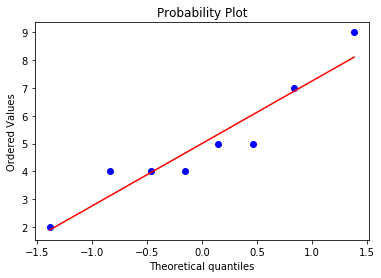

In [20]:
import scipy.stats as sct
sct.probplot(var, plot=plt)
plt.show()

In [21]:
import statsmodels.api as ss

Below is graph of<br>
<b>(3.2.1) Q-Q Plot (Quantile-Quantile Plot)</b>

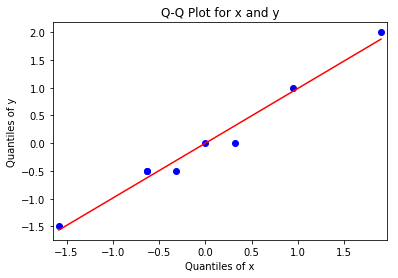

In [22]:
pp_x = ss.ProbPlot(np.array(x), fit=True)
pp_y = ss.ProbPlot(np.array(y), fit=True)
pp_x.qqplot(xlabel="Quantiles of x", ylabel="Quantiles of y", line='r', other=pp_y)
plt.title("Q-Q Plot for x and y")
plt.show()

Below is graph of<br>
<b>(3.2.2) P-P Plot (Probability-Probability / Percentile-Percentile Plot)</b>

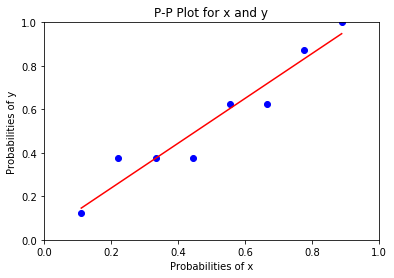

In [23]:
pp_x = ss.ProbPlot(np.array(x), fit=True)
pp_y = ss.ProbPlot(np.array(y), fit=True)
pp_x.ppplot(xlabel="Probabilities of x", ylabel="Probabilities of y", line='r', other=pp_y) #line='r' means Regression
plt.title("P-P Plot for x and y")
plt.show()

<b>(3.3) HISTOGRAM</b> and its <b>NORMAL DISTRIBUTION</b>*<br>
*<i>or also known as Symmetric / Gaussian Distribution (condition: <b>(mean == mode == median) == 0</b> and <b>std == 1</b>)</i>

Mode: 0
Median: 0
Mean: 0.0
Standard Deviation: 1.0
Lower Bound: -5.73982
Upper Bound: 5.20008


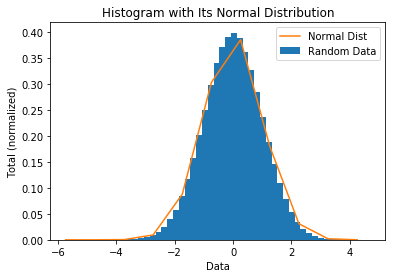

In [24]:
# np.random.randn --> for generate random number for normal dist
# abs --> Python syntax to return absolute number of given number
# np.ndarray.tolist --> convert np.array() to list[]
data = np.ndarray.tolist(np.random.randn(1000000))

check_if_unique = len(set(data)) == len(data)
if(check_if_unique): print("Mode:", 0)
else: 
    data_mode = st.mode(data)
    print("Mode: {}".format(data_mode))

data_median = round(st.median(data))
print("Median: {}".format(data_median))

data_mean = round(abs(np.mean(data)))
print("Mean: {}".format(data_mean))

data_stdeviation = round(np.std(data))
print("Standard Deviation: {}".format(data_stdeviation))

lower_bound = round(np.min(data) - 0.5, 5)
print("Lower Bound: {}".format(lower_bound))

upper_bound = round(np.max(data) + 0.5, 5)
print("Upper Bound: {}".format(upper_bound))

plt.hist(data, density=True, label="Random Data", histtype="bar", bins=50)
            # if DENSITY=True, data quantities are normalized into probability
x_axis = np.arange(((lower_bound - data_mean) / data_stdeviation), ((upper_bound - data_mean) / data_stdeviation))
plt.plot(x_axis, sct.norm.pdf(x_axis), label="Normal Dist")
plt.legend(loc="best")
plt.title("Histogram with Its Normal Distribution")
plt.xlabel("Data")
plt.ylabel("Total (normalized)")
plt.show()

<b>(3.4) BOXPLOT</b>

{'whiskers': [<matplotlib.lines.Line2D at 0x23fd225e860>,
 'caps': [<matplotlib.lines.Line2D at 0x23fd2291cc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x23fd225e2e8>],
 'medians': [<matplotlib.lines.Line2D at 0x23fd229e390>],
 'fliers': [<matplotlib.lines.Line2D at 0x23fd229e6d8>],
 'means': []}

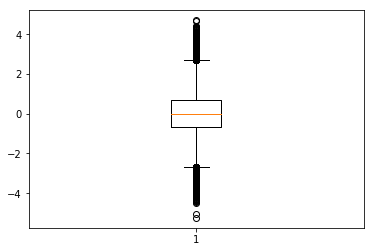

In [25]:
plt.boxplot(data)
# it occurs because mean == mode == median == 0

{'whiskers': [<matplotlib.lines.Line2D at 0x23fd2245470>,
 'caps': [<matplotlib.lines.Line2D at 0x23fd2245908>,
 'boxes': [<matplotlib.lines.Line2D at 0x23fd2245a58>,
 'medians': [<matplotlib.lines.Line2D at 0x23fcc0cc5f8>,
 'fliers': [<matplotlib.lines.Line2D at 0x23fd223cc88>,
 'means': []}

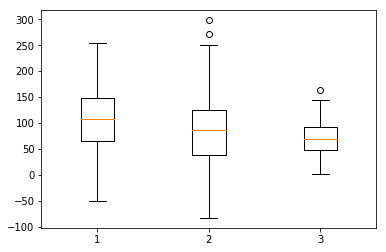

In [26]:
first_dataset = np.random.normal(100, 60, 200)
second_dataset = np.random.normal(90, 70, 200)
third_dataset = np.random.normal(70, 30, 200)
plt.boxplot([first_dataset, second_dataset, third_dataset])